<a href="https://colab.research.google.com/github/steffiangel/Projects/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


In [3]:
df=pd.read_csv('/content/creditcard_2023.csv')

In [4]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [5]:
df.isnull().sum()

,0
id,0
V1,0
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [6]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,40424.000000,40424.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,...,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000,40423.000000
mean,20211.500000,0.328061,-0.470973,1.047285,-0.643786,0.241939,0.492802,0.446248,-0.134021,0.733721,...,-0.120860,-0.123342,-0.052890,0.141132,0.154364,-0.023910,-0.205450,-0.089697,11972.454993,0.002598
std,11669.547978,0.626129,0.666586,0.697950,0.657267,0.667004,0.720494,0.536159,0.261557,0.861439,...,0.286418,0.575069,0.561225,1.104855,0.712031,1.111405,0.474274,0.823807,6929.394906,0.050900
min,0.000000,-3.495584,-49.966572,-2.518308,-4.468314,-5.182978,-21.111108,-3.038728,-6.595785,-2.170915,...,-10.699713,-6.262872,-19.297443,-4.067968,-10.230967,-4.059129,-5.536809,-24.176384,50.120000,0.000000
25%,10105.750000,-0.152774,-0.633430,0.592737,-1.005438,-0.031703,0.095611,0.248375,-0.186545,0.184813,...,-0.199206,-0.517207,-0.202387,-0.551768,-0.290280,-0.789848,-0.309042,-0.116796,5971.565000,0.000000
50%,20211.500000,0.099493,-0.411211,0.951960,-0.541664,0.153875,0.384659,0.408153,-0.141287,0.545810,...,-0.133974,-0.122492,-0.075619,0.154883,0.204334,-0.132233,-0.228203,-0.048064,11868.170000,0.000000
75%,30317.250000,0.959257,-0.206299,1.438845,-0.191422,0.374849,0.746188,0.593795,-0.079452,1.127613,...,-0.062815,0.238775,0.054613,0.847977,0.615459,0.677162,-0.138945,0.083928,17985.305000,0.000000
max,40423.000000,1.695400,3.368287,4.440555,3.139657,42.716891,9.704313,41.568286,5.958040,12.171681,...,6.834415,6.492043,23.570216,11.029578,10.424231,5.623285,26.944437,77.255937,24039.880000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40424 entries, 0 to 40423
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      40424 non-null  int64  
 1   V1      40424 non-null  float64
 2   V2      40423 non-null  float64
 3   V3      40423 non-null  float64
 4   V4      40423 non-null  float64
 5   V5      40423 non-null  float64
 6   V6      40423 non-null  float64
 7   V7      40423 non-null  float64
 8   V8      40423 non-null  float64
 9   V9      40423 non-null  float64
 10  V10     40423 non-null  float64
 11  V11     40423 non-null  float64
 12  V12     40423 non-null  float64
 13  V13     40423 non-null  float64
 14  V14     40423 non-null  float64
 15  V15     40423 non-null  float64
 16  V16     40423 non-null  float64
 17  V17     40423 non-null  float64
 18  V18     40423 non-null  float64
 19  V19     40423 non-null  float64
 20  V20     40423 non-null  float64
 21  V21     40423 non-null  float64
 22

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: >

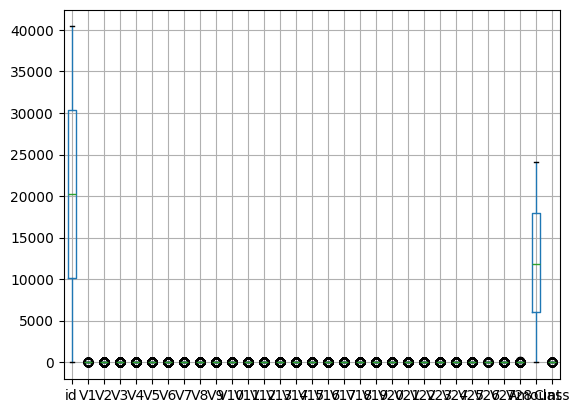

In [11]:
df.boxplot()


In [22]:
cols=df.columns.difference(['id','class'])
cols

Index(['Amount', 'Class', 'V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'],
      dtype='object')

In [23]:
def remove_outlier(df,cols):
  for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_b=q1-1.5*iqr
    upper_b=q3+1.5*iqr
    df=df[(df[col]>=lower_b)&(df[col]<=upper_b)]
  return df



In [25]:
df=df.drop_duplicates()
df=remove_outlier(df,cols)

In [30]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [35]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


if len(model.predict_proba(X_test).shape) > 1 and model.predict_proba(X_test).shape[1] > 1:
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print("ROC-AUC:", roc_auc)
else:
    print("ROC-AUC cannot be calculated as the model predicts only a single class.")


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       825

    accuracy                           1.00       825
   macro avg       1.00      1.00      1.00       825
weighted avg       1.00      1.00      1.00       825

ROC-AUC cannot be calculated as the model predicts only a single class.
